###### Malignant Comment Classifier -  Vinayak Ratan

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Training Dataset
df_train = pd.read_csv(r'G:\AI Professional\Data Trained\Internship Fliprobo Technologies\Malignant comments classifier\Malignant Comments Classifier Project\train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
# Test Dataset
df_test = pd.read_csv(r'G:\AI Professional\Data Trained\Internship Fliprobo Technologies\Malignant comments classifier\Malignant Comments Classifier Project\test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


##### Basic Information

<b> of Training Dataset </b>

In [4]:
df_train.shape

(159571, 8)

In [5]:
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df_train.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


<b> of Test Dataset </b>

In [8]:
df_test.shape

(153164, 2)

In [9]:
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [10]:
df_test.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


### Exploratory Data Analysis

##### Checking for null values

In [12]:
# Training data 
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

- There are no null values present in the training dataset 

In [13]:
# Test data 
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

- Even in the test data there are no null values

##### Summary Statistics

In [14]:
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,159571,159571,0000997932d777bf,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comment_text,159571,159571,Explanation\nWhy the edits made under my usern...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
malignant,159571.0,NaN,NaN,NaN,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
highly_malignant,159571.0,NaN,NaN,NaN,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
rude,159571.0,NaN,NaN,NaN,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,NaN,NaN,NaN,0.002996,0.05465,0.0,0.0,0.0,0.0,1.0
abuse,159571.0,NaN,NaN,NaN,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
loathe,159571.0,NaN,NaN,NaN,0.008805,0.09342,0.0,0.0,0.0,0.0,1.0


In [15]:
df_test.describe(include = 'all').T

,count,unique,top,freq
id,153164,153164,00001cee341fdb12,1
comment_text,153164,153164,Yo bitch Ja Rule is more succesful then you'll...,1


##### Correlation

In [16]:
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

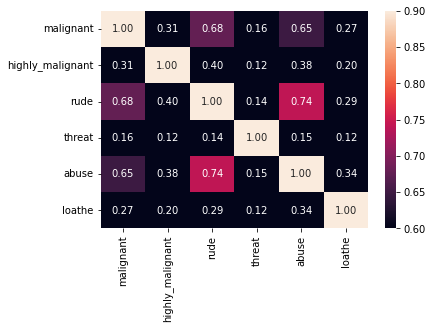

In [17]:
# Let's plot the heatmap
sns.heatmap(df_train.corr(), annot = True, fmt ="0.2f", vmin = 0.6, vmax = 0.9)

- Nude and abuse are very highly correlated, this means those who commented nude also abused
- Abuse and nude even highly correlated to the target variable Malignant

In [18]:
col = df_train.columns
col

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

0    144277
1     15294
Name: malignant, dtype: int64


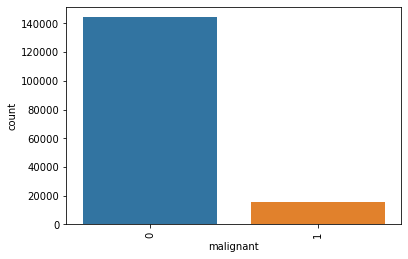

0    157976
1      1595
Name: highly_malignant, dtype: int64


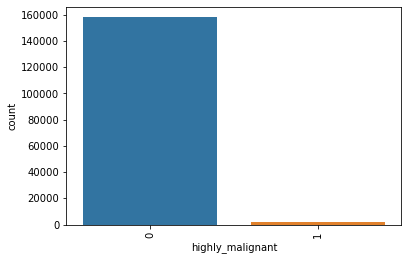

0    151122
1      8449
Name: rude, dtype: int64


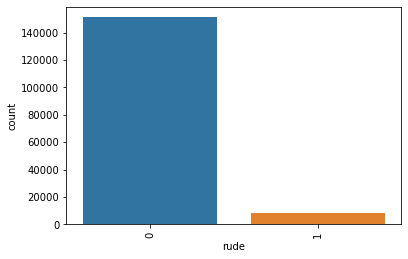

0    159093
1       478
Name: threat, dtype: int64


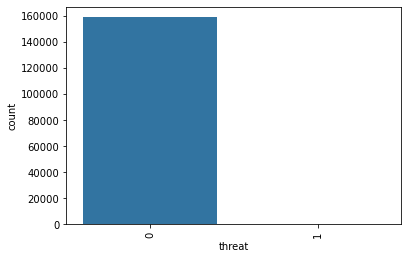

0    151694
1      7877
Name: abuse, dtype: int64


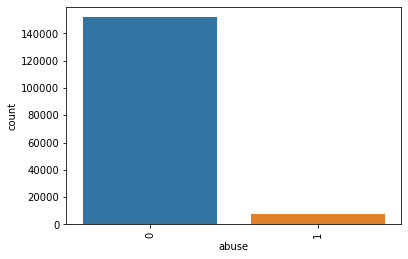

0    158166
1      1405
Name: loathe, dtype: int64


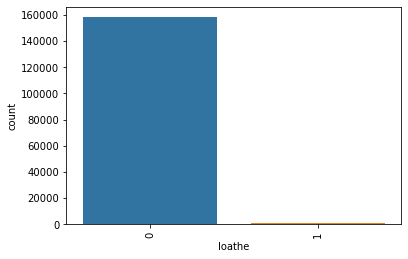

In [19]:
# Let's plot the count plot 
for i in col[2:]:
    print(df_train[i].value_counts())
    sns.countplot(x=i, data = df_train)
    plt.xticks(rotation = 'vertical')
    plt.show()

In [20]:
sentencetype_graph=df_train.iloc[:,2:].sum()
sentencetype_graph

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

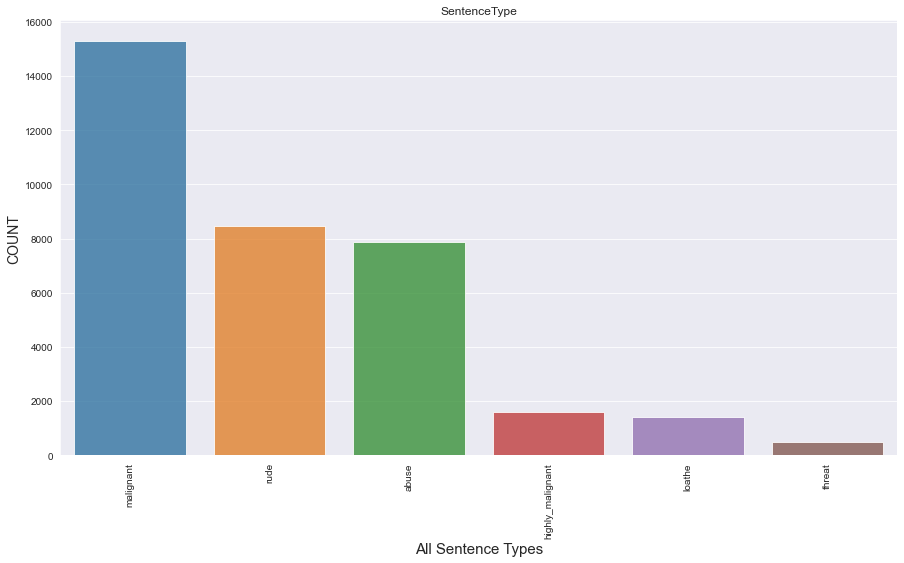

In [21]:
sns.set_style("darkgrid")
ls=sentencetype_graph.sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp =sns.barplot(ls.index, ls.values, alpha=0.8) 
plt.title('SentenceType')
plt.ylabel('COUNT', fontsize=14)
plt.xlabel('All Sentence Types', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.show()

##### Skewness

In [22]:
df_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

##### NLP

In [25]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [26]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
df_train['comment_text'] = df_train['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [27]:
df_train['comment_text']

0         explanation why the edits made under my userna...
1         d aww  he matches this background colour i m s...
2         hey man  i m really not trying to edit war  it...
3           more i can t make any real suggestions on im...
4         you  sir  are my hero  any chance you remember...
                                ...                        
159566          and for the second time of asking  when ...
159567    you should be ashamed of yourself   that is a ...
159568    spitzer   umm  theres no actual article for pr...
159569    and it looks like it was actually you who put ...
159570      and     i really don t think you understand ...
Name: comment_text, Length: 159571, dtype: object

In [29]:
abuse_comment_df=df_train.loc[:,['id','comment_text','abuse']]
abuse_comment_df

,id,comment_text,abuse
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [31]:
loathe_comment_df=df_train.loc[:,['id','comment_text','loathe']]
loathe_comment_df

,id,comment_text,loathe
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [33]:
rude_comment_df=df_train.loc[:,['id','comment_text','rude']]
rude_comment_df

,id,comment_text,rude
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [35]:
threat_comment_df=df_train.loc[:,['id','comment_text','threat']]
threat_comment_df

,id,comment_text,threat
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [37]:
highly_malignant_comment_df=df_train.loc[:,['id','comment_text','highly_malignant']]
highly_malignant_comment_df

,id,comment_text,highly_malignant
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [38]:
malignant_comment_df=df_train.loc[:,['id','comment_text','malignant']]
malignant_comment_df

,id,comment_text,malignant
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0
...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when ...,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pr...,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0


In [41]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [42]:
def wordcloud(df_train, label):
    
    subset=df_train[df_train[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=2000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

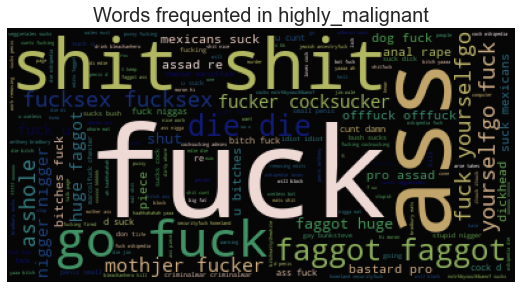

In [43]:
wordcloud(highly_malignant_comment_df,'highly_malignant')

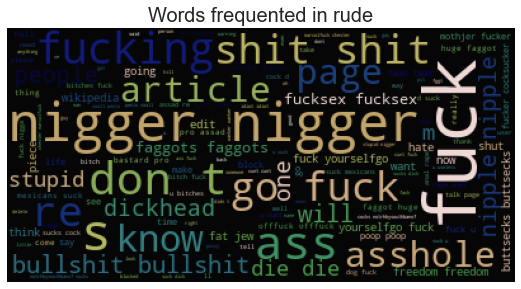

In [44]:
wordcloud(rude_comment_df,'rude')

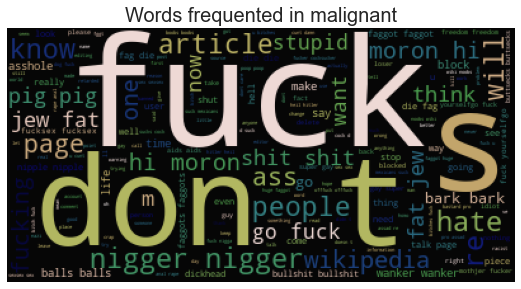

In [45]:
wordcloud(malignant_comment_df,'malignant')

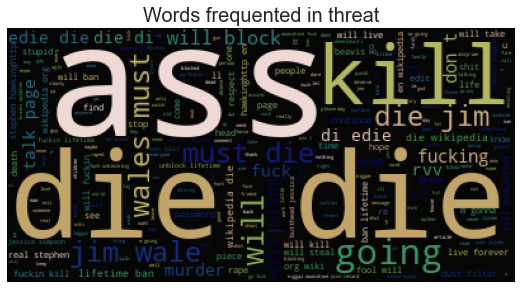

In [46]:
wordcloud(threat_comment_df,'threat')

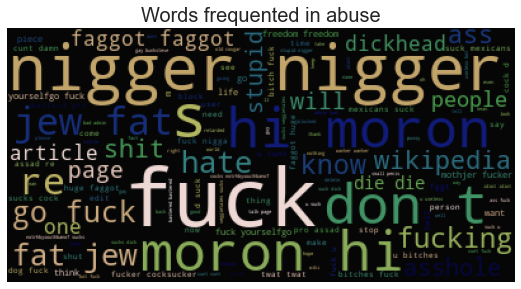

In [47]:
wordcloud(abuse_comment_df,'abuse')

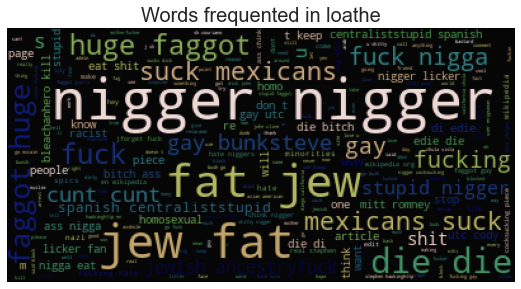

In [48]:
wordcloud(loathe_comment_df,'loathe')

In [50]:
# Balancing the target column
malignant_comment_balanced_1 = malignant_comment_df[malignant_comment_df['malignant'] == 1].iloc[0:5000,:]
malignant_comment_balanced_0 = malignant_comment_df[malignant_comment_df['malignant'] == 0].iloc[0:5000,:]
malignant_comment_balanced_1.shape, malignant_comment_balanced_0.shape

((5000, 3), (5000, 3))

In [51]:
malignant_comment_balanced=pd.concat([malignant_comment_balanced_1,malignant_comment_balanced_0])
malignant_comment_balanced['malignant'].value_counts()

1    5000
0    5000
Name: malignant, dtype: int64

In [52]:
highly_malignant_comment_df['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [53]:
highly_malignant_comment_df_1 = highly_malignant_comment_df[highly_malignant_comment_df['highly_malignant'] == 1].iloc[0:1595,:]

In [54]:
highly_malignant_comment_df_0 = highly_malignant_comment_df[highly_malignant_comment_df['highly_malignant'] == 0].iloc[0:1595,:]

In [55]:
highly_malignant_comment_balanced=pd.concat([highly_malignant_comment_df_1,highly_malignant_comment_df_0])
highly_malignant_comment_balanced['highly_malignant'].value_counts()

1    1595
0    1595
Name: highly_malignant, dtype: int64

In [56]:
# Balancing other features
rude_comment_df['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [57]:
rude_comment_df_1 = rude_comment_df[rude_comment_df['rude'] == 1].iloc[0:5000,:] 
rude_comment_df_0 = rude_comment_df[rude_comment_df['rude'] == 0].iloc[0:5000,:]

In [58]:
rude_comment_balanced = pd.concat([rude_comment_df_1,rude_comment_df_0])
rude_comment_balanced['rude'].value_counts()

1    5000
0    5000
Name: rude, dtype: int64

In [59]:
threat_comment_df_1 = threat_comment_df[threat_comment_df['threat'] == 1].iloc[0:478,:]
threat_comment_df_0 = threat_comment_df[threat_comment_df['threat'] == 0].iloc[0:478,:]
threat_comment_balanced = pd.concat([threat_comment_df_1,threat_comment_df_0])
threat_comment_balanced['threat'].value_counts()

1    478
0    478
Name: threat, dtype: int64

In [61]:
abuse_comment_df_1 = abuse_comment_df[abuse_comment_df['abuse'] == 1].iloc[0:5000,:]
abuse_comment_df_0 = abuse_comment_df[abuse_comment_df['abuse'] == 0].iloc[0:5000,:]
abuse_comment_balanced = pd.concat([abuse_comment_df_1,abuse_comment_df_0])
abuse_comment_balanced['abuse'].value_counts()

1    5000
0    5000
Name: abuse, dtype: int64

In [62]:
loathe_comment_df_1 = loathe_comment_df[loathe_comment_df['loathe'] == 1].iloc[0:1405,:]
loathe_comment_df_0 = loathe_comment_df[loathe_comment_df['loathe'] == 0].iloc[0:1405,:]
loathe_comment_balanced = pd.concat([loathe_comment_df_1,loathe_comment_df_0])
loathe_comment_balanced['loathe'].value_counts()

1    1405
0    1405
Name: loathe, dtype: int64

### Model Building

In [63]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import ngrams,bigrams,trigrams

In [64]:
def cv_tf_train_test(dataframe,label,vectorizer,ngram):

    # Split the data into X and y data sets
    X = dataframe.comment_text
    y = dataframe[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

    # Using vectorizer and removing stopwords
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    # Transforming x-train and x-test
    X_train_cv1 = cv1.fit_transform(X_train) 
    X_test_cv1  = cv1.transform(X_test)      
    
    ## Machine learning models   
    
    ## Logistic regression
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    
    ## k-nearest neighbours
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    ## Naive Bayes
    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    
    ## Multinomial naive bayes
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    
    ## Support vector machine
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    ## Random Forest 
    randomforest = RandomForestClassifier(n_estimators=100, random_state=50)
    randomforest.fit(X_train_cv1, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
    ## Saving f1 score results into a dataframe                     
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [66]:
highly_malignant_comment_cv = cv_tf_train_test(highly_malignant_comment_balanced, 'highly_malignant', TfidfVectorizer, (1,1))
highly_malignant_comment_cv.rename(columns={'F1 Score': 'F1 Score(highly_malignant)'}, inplace=True)
highly_malignant_comment_cv

,F1 Score(highly_malignant)
Log Regression,0.940282
KNN,0.860192
BernoulliNB,0.790738
MultinomialNB,0.931423
SVM,0.937901
Random Forest,0.941176


In [67]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [68]:
rude_comment_cv = cv_tf_train_test(rude_comment_balanced, 'rude', TfidfVectorizer, (1,1))
rude_comment_cv.rename(columns={'F1 Score': 'F1 Score(rude)'}, inplace=True)
rude_comment_cv

,F1 Score(rude)
Log Regression,0.901183
KNN,0.513066
BernoulliNB,0.766640
MultinomialNB,0.887203
SVM,0.915613
Random Forest,0.897731


In [69]:
threat_comment_cv = cv_tf_train_test(threat_comment_balanced, 'threat', TfidfVectorizer, (1,1))
threat_comment_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)
threat_comment_cv

,F1 Score(threat)
Log Regression,0.897338
KNN,0.852459
BernoulliNB,0.745205
MultinomialNB,0.902098
SVM,0.894737
Random Forest,0.923077


In [70]:
abuse_comment_cv = cv_tf_train_test(abuse_comment_balanced, 'abuse', TfidfVectorizer, (1,1))
abuse_comment_cv.rename(columns={'F1 Score': 'F1 Score(abuse)'}, inplace=True)
abuse_comment_cv

,F1 Score(abuse)
Log Regression,0.902166
KNN,0.250145
BernoulliNB,0.776986
MultinomialNB,0.896299
SVM,0.906218
Random Forest,0.889201


In [71]:
loathe_comment_cv = cv_tf_train_test(loathe_comment_balanced, 'loathe', TfidfVectorizer, (1,1))
loathe_comment_cv.rename(columns={'F1 Score': 'F1 Score(loathe)'}, inplace=True)
loathe_comment_cv

,F1 Score(loathe)
Log Regression,0.905707
KNN,0.776042
BernoulliNB,0.776699
MultinomialNB,0.903302
SVM,0.895449
Random Forest,0.895000


In [72]:
X = malignant_comment_balanced.comment_text
y = malignant_comment_balanced['malignant']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initiate a Tfidf vectorizer
tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)  
X_test_fit = tfv.transform(X_test)  
randomforest = RandomForestClassifier(n_estimators=100, random_state=50)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [73]:
comment1 = ['i killed an insect and ate it']
comment1_vect = tfv.transform(comment1)
randomforest.predict_proba(comment1_vect)[:,1]

array([0.6752818])

In [91]:
from sklearn.metrics import accuracy_score, classification_report

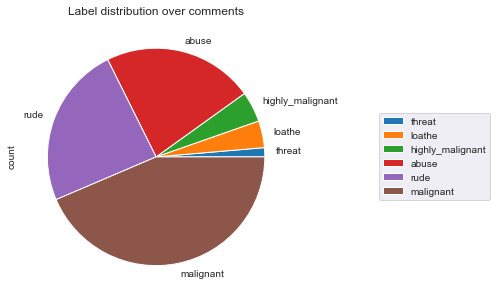

In [83]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count', title='Label distribution over comments', figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [84]:
target_data = df_train[cols_target]

df_train['bad'] =df_train[cols_target].sum(axis =1)
print(df_train['bad'].value_counts())
df_train['bad'] = df_train['bad'] > 0 
df_train['bad'] = df_train['bad'].astype(int)
print(df_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


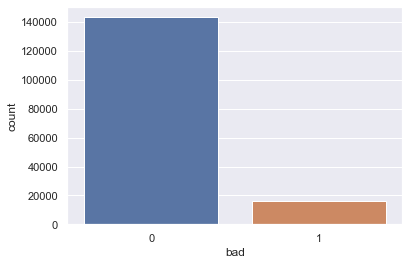

In [85]:
sns.set()
sns.countplot(x="bad" , data = df_train)
plt.show()

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_train['comment_text'])
x = features

In [87]:
df_train.shape, df_test.shape

((159571, 9), (153164, 2))

In [88]:
y=df_train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [89]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [92]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9593908629441624
Test accuracy is 0.9555690173796791
[[42767   238]
 [ 1889  2978]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43005
           1       0.93      0.61      0.74      4867

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [95]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988003473621071
Test accuracy is 0.9569059157754011
[[42430   575]
 [ 1488  3379]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     43005
           1       0.85      0.69      0.77      4867

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [98]:
#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9496683049982543
Test accuracy is 0.9491769719251337
[[42638   367]
 [ 2066  2801]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43005
           1       0.88      0.58      0.70      4867

    accuracy                           0.95     47872
   macro avg       0.92      0.78      0.83     47872
weighted avg       0.95      0.95      0.94     47872



In [99]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9214496101128927
Test accuracy is 0.9171122994652406
[[42860   145]
 [ 3823  1044]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     43005
           1       0.88      0.21      0.34      4867

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.65     47872
weighted avg       0.91      0.92      0.89     47872



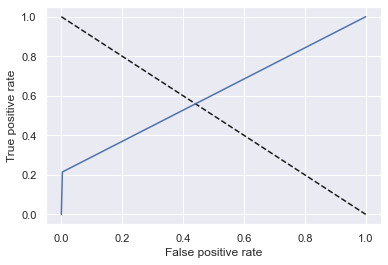

In [101]:
#Plotting the graph which tells us about the area under curve to see which model is performing better
from sklearn.metrics import auc
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [104]:
import eli5
# gives us top 15 features or words  which makes a comment toxic
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest


Weight,Feature
0.0704 ± 0.0609,fuck
0.0377 ± 0.0383,fucking
0.0318 ± 0.0336,shit
0.0204 ± 0.0230,ass
0.0191 ± 0.0143,stupid
0.0166 ± 0.0160,suck
0.0165 ± 0.0192,bitch
0.0154 ± 0.0103,idiot
0.0142 ± 0.0132,asshole
0.0124 ± 0.0120,dick


In [105]:
test_data =tf_vec.fit_transform(df_test['comment_text'])










test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [106]:
prediction=RF.predict(test_data)
prediction

array([0, 1, 0, ..., 1, 0, 0])

In [108]:
prediction1 = pd.DataFrame(data = prediction, columns = ["predicted malignant"])
prediction1

,predicted malignant
0,0
1,1
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,1
153162,0


In [109]:
final_test_predict = df_test
final_test_predict

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [110]:
final_test_predict['Malignant prediction'] = prediction1['predicted malignant']
final_test_predict

,id,comment_text,Malignant prediction
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",1
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",0


In [111]:
final_test_predict.to_csv("Malignant_test_prediction.csv")

##### Pickling

In [112]:
import joblib
joblib.dump(RF,"Malignant.pkl")

['Malignant.pkl']

##### Thank You